In [68]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets

Text(0, 0.5, 'Целевая переменная')

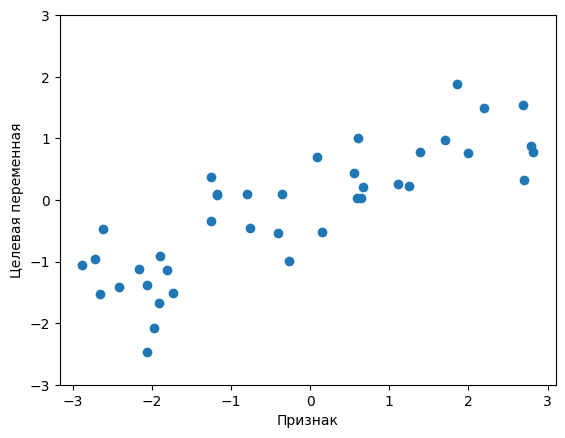

In [69]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Keys of cancer(): \n{}".format(cancer.keys()))

Keys of cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [71]:
print("Shape of the array data for cancer dataset: {}".format(cancer.data.shape))

Shape of the array data for cancer dataset: (569, 30)


In [72]:
print("Number of examples for each class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Number of examples for each class:
{'malignant': 212, 'benign': 357}


In [73]:
print("Name of the features:\n{}".format(cancer.feature_names))

Name of the features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [74]:
# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# print("Shape of the array data for housing dataset: {}".format(housing.data.shape))

In [75]:
X, y = mglearn.datasets.load_extended_boston()
print("Shape of the array X: {}".format(X.shape))

Shape of the array X: (506, 104)


Shape of the X array: (26, 2)


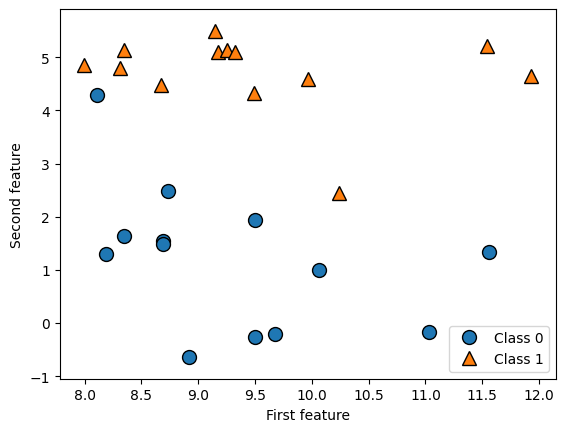

In [76]:
X, y = mglearn.datasets.make_forge()
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("Shape of the X array: {}".format(X.shape))

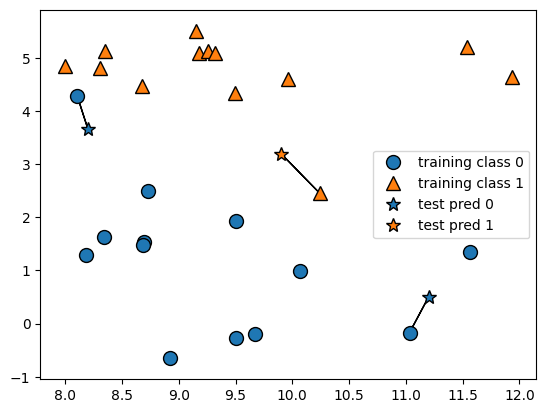

In [77]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

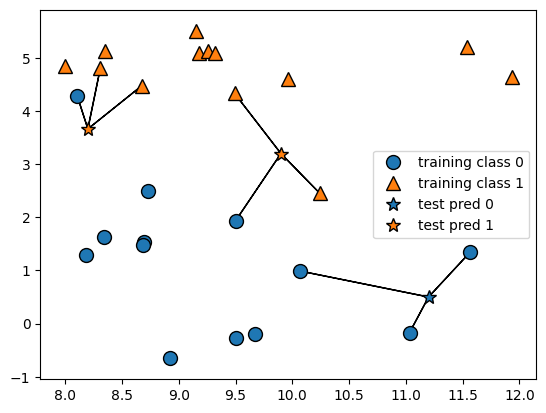

In [78]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [79]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [81]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
print("Prediction on the test set: {}".format(clf.predict(X_test)))

Prediction on the test set: [1 0 1 0 1 0 0]


In [83]:
print("Correctness on the test set: {:.2f}".format(clf.score(X_test,y_test)))

Correctness on the test set: 0.86


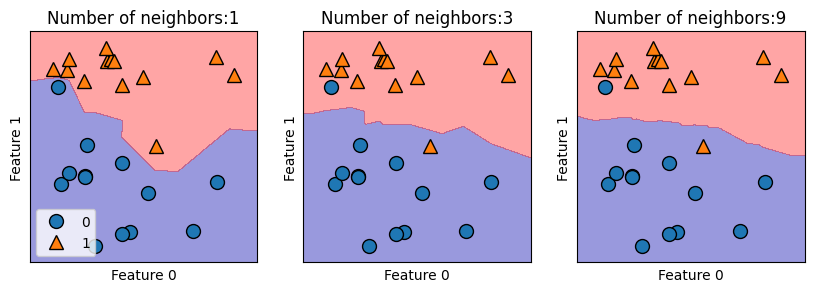

In [84]:
fix, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Number of neighbors:{}".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

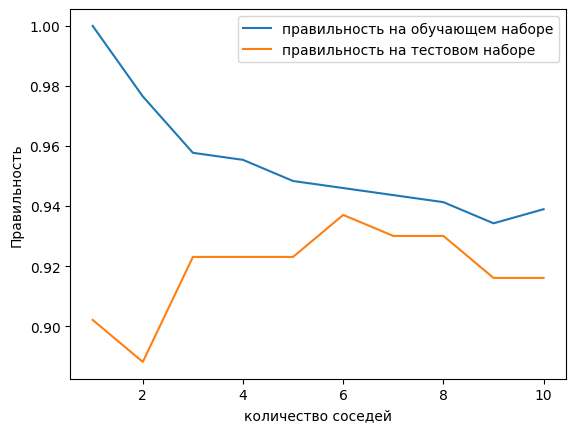

In [85]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
# строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train1, y_train1)
# записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train1, y_train1))
# записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test1, y_test1))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

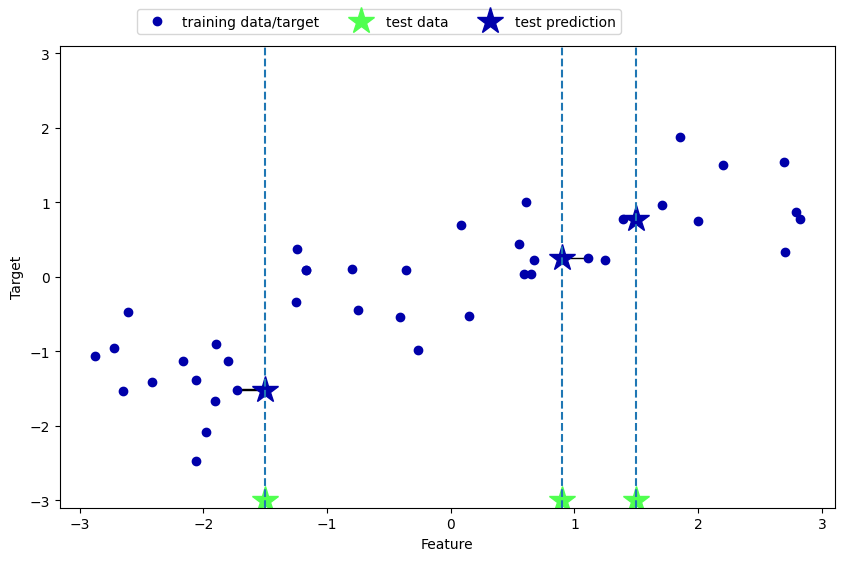

In [86]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

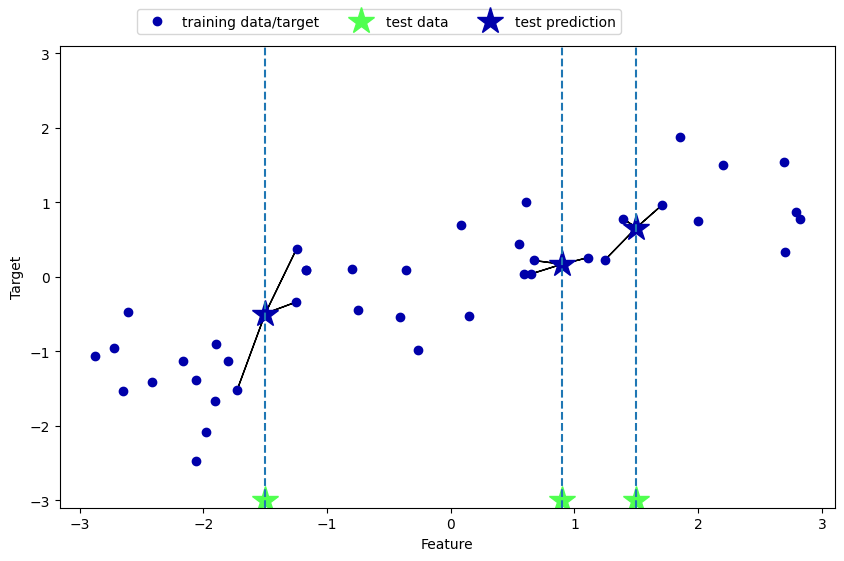

In [87]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [88]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [89]:
print("Predictions for the test set: \n{}".format(reg.predict(X_test)))

Predictions for the test set: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [90]:
print("R^2 on the test set: {:.2f}".format(reg.score(X_test,y_test)))

R^2 on the test set: 0.83


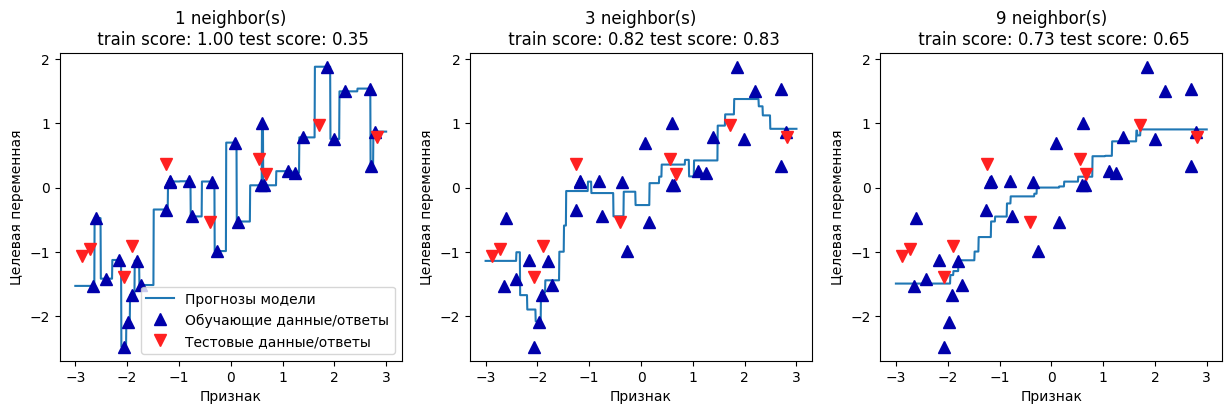

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
# получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы","Тестовые данные/ответы"], loc="best")

w[0]: 0.393906  b: -0.031804


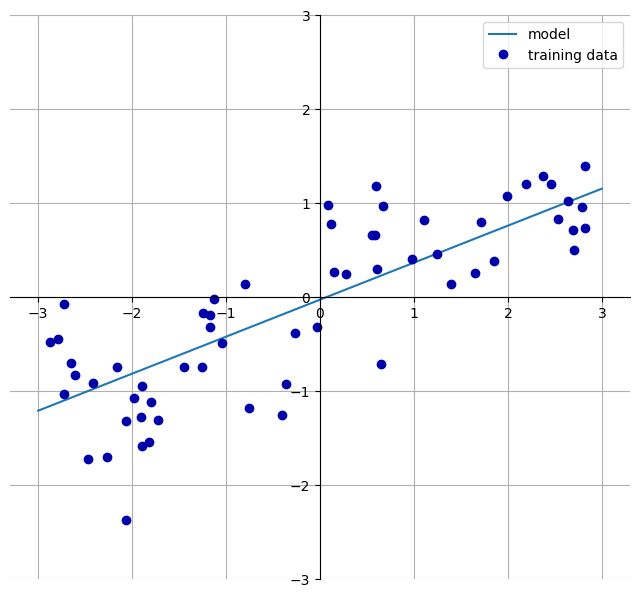

In [92]:
mglearn.plots.plot_linear_regression_wave()

In [93]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [94]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [95]:
print("Correctness on the train set: {:.2f}".format(lr.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lr.score(X_test,y_test)))

Correctness on the train set: 0.67
Correctness on the test set: 0.66


In [96]:
X3, y3 = mglearn.datasets.load_extended_boston()
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,random_state=0)
lr3 = LinearRegression().fit(X_train3, y_train3)

In [97]:
print("Correctness on the train set: {:.2f}".format(lr3.score(X_train3,y_train3)))
print("Correctness on the test set: {:.2f}".format(lr3.score(X_test3,y_test3)))

Correctness on the train set: 0.95
Correctness on the test set: 0.61


In [98]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train3,y_train3)
ridge01 = Ridge(alpha=0.1).fit(X_train3,y_train3)
ridge10 = Ridge(alpha=10).fit(X_train3,y_train3)
print("Correctness on the train set: {:.2f}".format(ridge.score(X_train3,y_train3)))
print("Correctness on the test set: {:.2f}".format(ridge.score(X_test3,y_test3)))

Correctness on the train set: 0.89
Correctness on the test set: 0.75


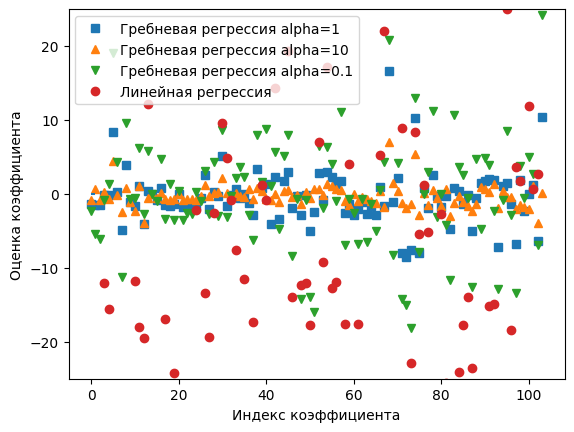

In [99]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr3.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

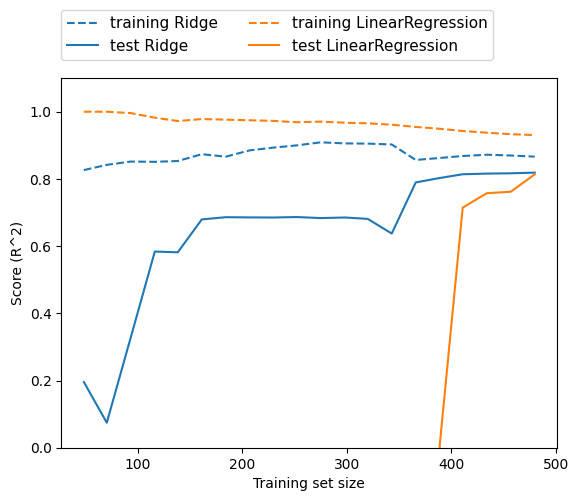

In [100]:
mglearn.plots.plot_ridge_n_samples()

In [101]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train3, y_train3)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train3, y_train3)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train3, y_train3)
# print("Correctness on the train set: {:.2f}".format(lasso.score(X_train3,y_train3)))
# print("Correctness on the test set: {:.2f}".format(lasso.score(X_test3,y_test3)))   
# print("Number of the used features: {}".format(np.sum(lasso.coef_ != 0)))
print("Correctness on the train set: {:.2f}".format(lasso001.score(X_train3,y_train3)))
print("Correctness on the test set: {:.2f}".format(lasso001.score(X_test3,y_test3)))   
print("Number of the used features: {}".format(np.sum(lasso001.coef_ != 0)))

Correctness on the train set: 0.90
Correctness on the test set: 0.77
Number of the used features: 33


Text(0, 0.5, 'Оценка коэффициента')

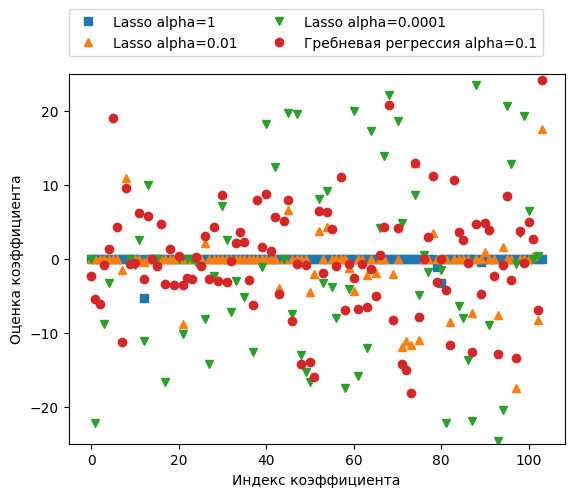

In [102]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


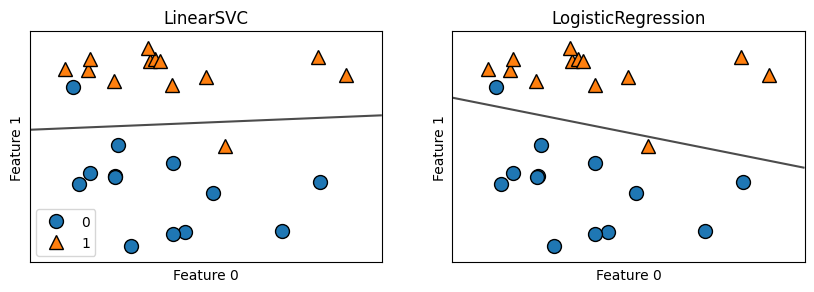

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [104]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train1,y_train1)
logreg100 = LogisticRegression(C=100).fit(X_train1,y_train1)
logreg001 = LogisticRegression(C=0.01).fit(X_train1,y_train1)
print("Correctness on the train set: {:.3f}".format(logreg.score(X_train1,y_train1)))
print("Correctness on the test set: {:.3f}".format(logreg.score(X_test1,y_test1)))  
print("Correctness on the train set: {:.3f}".format(logreg100.score(X_train1,y_train1)))
print("Correctness on the test set: {:.3f}".format(logreg100.score(X_test1,y_test1)))   
print("Correctness on the train set: {:.3f}".format(logreg001.score(X_train1,y_train1)))
print("Correctness on the test set: {:.3f}".format(logreg001.score(X_test1,y_test1)))   

Correctness on the train set: 0.951
Correctness on the test set: 0.965
Correctness on the train set: 0.946
Correctness on the test set: 0.958
Correctness on the train set: 0.934
Correctness on the test set: 0.930


C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

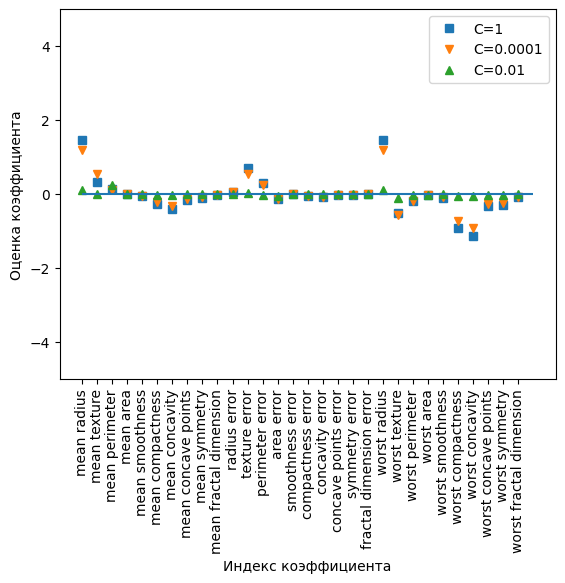

In [105]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=0.0001")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()